In [1]:
import tensorflow as tf, pandas as pd, numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# make sure I can access datatools
import os
import sys
root_dir = '/Users/cerber/Projects/Lambo/ml/'
if root_dir not in sys.path:
    sys.path.append(root_dir)

In [3]:
from MLDataTools import MLDataSet
from MLDataTools.preprocessing import relative_change_rates, chunks

df = pd.read_csv('../../data/stocks/_SP500.csv')
FEATURES = ["Open","High","Low","Close","Adj Close"]
TARGETS = ['Close','High']
normalized = np.array(relative_change_rates(df[FEATURES].values))
normalized_df = pd.DataFrame(normalized, columns=FEATURES, dtype=np.float64)
ds = MLDataSet(normalized_df,features=FEATURES,targets=TARGETS)

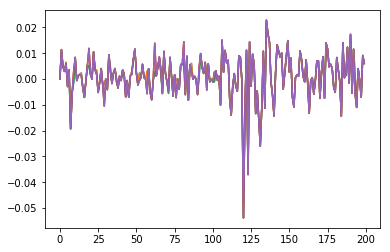

In [4]:
vals = normalized_df.values
plt.plot(vals[:200])
plt.show()

In [5]:
from models.LSTM.LSTM import LSTM
sess = tf.Session()

model = LSTM(
    sess=sess,
    num_layers=1,
    lstm_size=128,
    feature_len=len(FEATURES), 
    targets_shape=len(TARGETS),
    num_steps=20,
    epochs=15,
    plot_dir='./plot_dir'
)


In [6]:
model.build_graph()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [7]:
model.train(ds)

Epoch:0 ---- [Learning rate: 0.001000] [test_loss:0.000104] 


KeyboardInterrupt: 